In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns

In [2]:
#X,y =  fetch_openml('diabetes', version=1, as_frame=True, return_X_y=True)
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/house_pricing.csv'
df = pd.read_csv(url)
df.head()

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


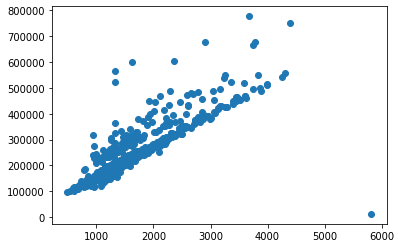

In [3]:
#Relation between area and price
plt.scatter(df.SquareFeet, df.Price)

check correlation between features and target when using linear models

- features are numerical
- predictors are numerical

Pearson Correlations: 0.851755035476082


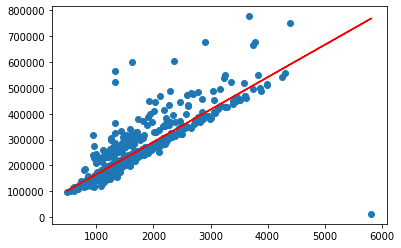

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['SquareFeet']], df.Price)
pred = model.predict(df[['SquareFeet']])
plt.scatter(df.SquareFeet, df.Price)
plt.plot(df.SquareFeet, pred, color='red')

# pearson corrections
pc = df.SquareFeet.corr(df.Price)
print('Pearson Correlations:', pc)

In [5]:
# method to calculate p value 

df.select_dtypes(include='number').corrwith(df.Price)

Beds          0.609677
Baths         0.632218
SquareFeet    0.851755
Price         1.000000
dtype: float64

Pearson Coreelation 
- if value close to 1, strong positive correlation
- if value close to -1, strong negative correlation
- if value close to 0, no correlation

In [6]:
df.select_dtypes(include='number').columns

Index(['Beds', 'Baths', 'SquareFeet', 'Price'], dtype='object')

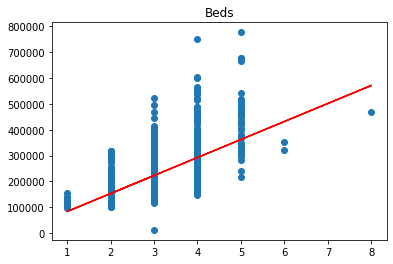

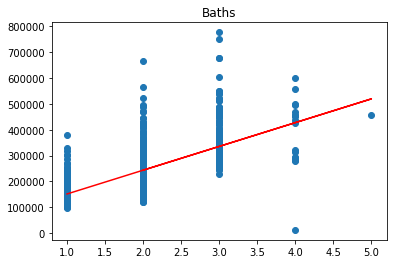

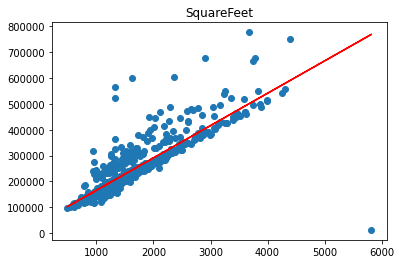

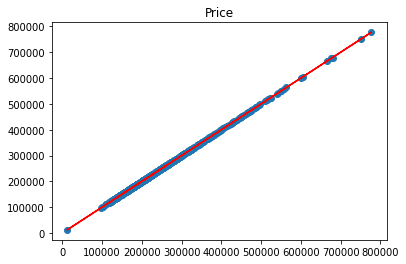

In [7]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    plt.scatter(df[col], df.Price)  
    plt.title(col)
    model = LinearRegression()
    model.fit(df[[col]], df.Price)
    plt.plot(df[col], model.predict(df[[col]]), color='red')
    plt.show()

For categorical independent variables with numerical target
boxplot analysis (visual)
anova test
- null hypothesis: means of the groups are equal
- if p-value < 0.05, reject null hypothesis
- if p-value > 0.05, fail to reject null hypothesis

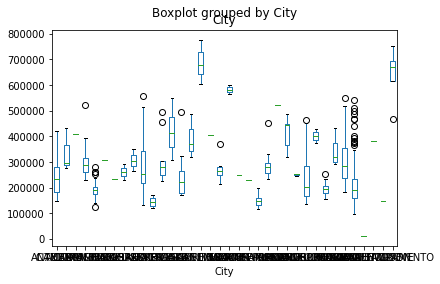

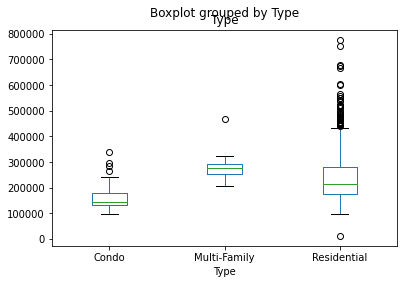

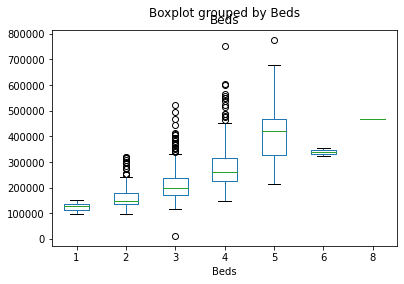

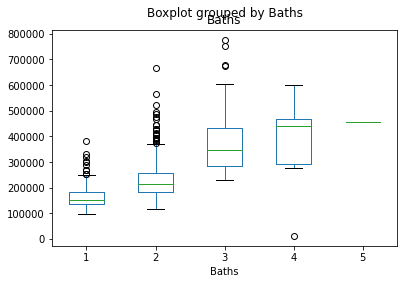

In [8]:
cat_cols = ['City', 'Type', 'Beds', 'Baths']
for col in cat_cols:
    df.boxplot(column='Price', by=col, grid=False)
    plt.title(col)

# Testing with Anova 
- for each feature, calculate the f-statistic and p-value
- if p-value < 0.05, reject null hypothesis (means the column is important)
- if p-value > 0.05, fail to reject null hypothesis (means the column is not important)

In [9]:
selected_cols = ['SquareFeet', 'Beds', 'Baths', 'Type']
X = df[selected_cols]
y = df.Price

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [11]:
num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(include='object').columns
num_pipe = Pipeline([
    ('scaler', StandardScaler())
])
cat_pipe = Pipeline([
    ('onehot', OneHotEncoder())
])
preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

model = Pipeline([
    ('pre', preprocessor),
    ('lr', LinearRegression())
])

model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SquareFeet', 'Beds', 'Baths'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Type'], dtype='object'))])),
                ('lr', LinearRegression())])

a learning curve test can be used to check if the model is overfitting or underfitting at this point

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X, y)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test) 

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Training Results")
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("R2:", r2_score(y_train, y_train_pred))
print('-'*50)
print("Testing Results")
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R2:", r2_score(y_test, y_test_pred))

Training Results
MSE: 3032811532.3047304
MAE: 27850.244880196457
R2: 0.7003471990037027
--------------------------------------------------
Testing Results
MSE: 840640669.2694879
MAE: 21781.185063703786
R2: 0.8789215467555099


Model Persistance

In [14]:
import joblib
import os 
#create a dictory to save model 
os.makedirs(os.path.join(os.getcwd(), 'models'), exist_ok=True)
#save model - dumpling 
path = os.path.join(os.getcwd(), 'models', 'house_price_model')
joblib.dump(model,path)

['d:\\My Files\\Python_001\\AI and ML Feb 2024\\Supervised_learnning\\models\\house_price_model']

In [15]:
#loading a save models

In [16]:
path = os.path.join(os.getcwd(), 'models', 'house_price_model')
model = joblib.load(path)
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SquareFeet', 'Beds', 'Baths'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Type'], dtype='object'))])),
                ('lr', LinearRegression())])

#making predictions with a model 

In [17]:
X.head()

,SquareFeet,Beds,Baths,Type
0,836,2,1,Residential
1,1167,3,1,Residential
2,796,2,1,Residential
3,852,2,1,Residential
4,797,2,1,Residential


In [18]:
print(model.predict(X.head()))

[139996.11179956 183919.99031679 135229.32839317 141902.82516212
 135348.49797833]


In [19]:
print(X.Type.unique().tolist())

['Residential', 'Condo', 'Multi-Family']


In [20]:
# for manual data 

X.columns.tolist()
inpX = pd.DataFrame({
    'SquareFeet': [2000],
    'Beds': [3],
    'Baths': [2],
    'Type': ['Condo'] 
})

result = model.predict(inpX)
print(*result, sep='\n')

296617.79786467104


evaluating th etraining and testing performance of a model 

In [21]:
from sklearn.model_selection import learning_curve, cross_val_score

train_sizes = [.1, .2, .3, .4, .5, .6, .7, .8, .9]

train_sizes, train_scores, test_score = learning_curve(model, X, y, cv=5, train_sizes=train_sizes)

print(train_sizes)
print(train_scores)
print(train_scores.mean(axis=1))
print(test_score.mean(axis=1))

# below given waring can be remove by deleting 0.1

c:\Users\Public\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Public\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\Public\miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\Public\miniconda3\lib\site-packages\sklearn\pipeline.py", line 993, in score
    Xt = transform.transform(Xt)
  File "c:\Users\Public\miniconda3\lib\site-packages\sklearn\utils\_set_output.py", line 273, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "c:\Users\Public\miniconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 1014, in transform
    Xs = self._call_func_on_transfo

[ 65 130 195 260 325 390 455 520 585]
[[0.60168659 0.8225763  0.8225763  0.8225763  0.8225763 ]
 [0.76191389 0.87709754 0.87709754 0.87709754 0.87709754]
 [0.79362288 0.90366581 0.91009111 0.91009111 0.91009111]
 [0.78774538 0.88939082 0.85139942 0.85139942 0.85139942]
 [0.77442158 0.82819743 0.83560757 0.83560757 0.83560757]
 [0.78753374 0.83567846 0.84344498 0.83082995 0.83082995]
 [0.78328682 0.83009942 0.83635633 0.82629639 0.82629639]
 [0.76011994 0.79823128 0.80490852 0.80456998 0.8122308 ]
 [0.69061191 0.7131236  0.72062905 0.73195133 0.81149461]]
[0.77839836 0.85406081 0.8855124  0.84626689 0.82188835 0.82566341
 0.82046707 0.79601211 0.7335621 ]
[       nan 0.68084434 0.69181444 0.69917174 0.69992435 0.70058582
 0.70235974 0.6989901  0.6943628 ]


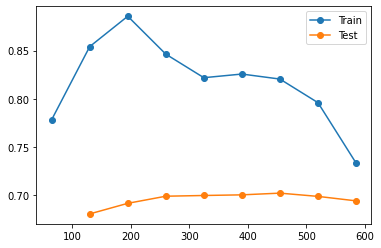

In [22]:
plt.plot(train_sizes, train_scores.mean(axis=1), label = 'Train', marker = 'o')
plt.plot(train_sizes, test_score.mean(axis=1), label='Test', marker = 'o')
plt.legend()
plt.show()


#DecisionTreeRegressor
making decision tree model , to check the updated accurary

In [23]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [24]:
model2 = Pipeline([
    ('pre', preprocessor),
    ('dt', DecisionTreeRegressor())
])
model2.fit(X_train, y_train)
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Training Results")
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("R2:", r2_score(y_train, y_train_pred))
print('-'*50)
print("Testing Results")
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R2:", r2_score(y_test, y_test_pred))

Training Results
MSE: 142280385.11637396
MAE: 2544.8978509984636
R2: 0.9859421808863428
--------------------------------------------------
Testing Results
MSE: 3832481842.388027
MAE: 32740.392858895706
R2: 0.44800318313510057


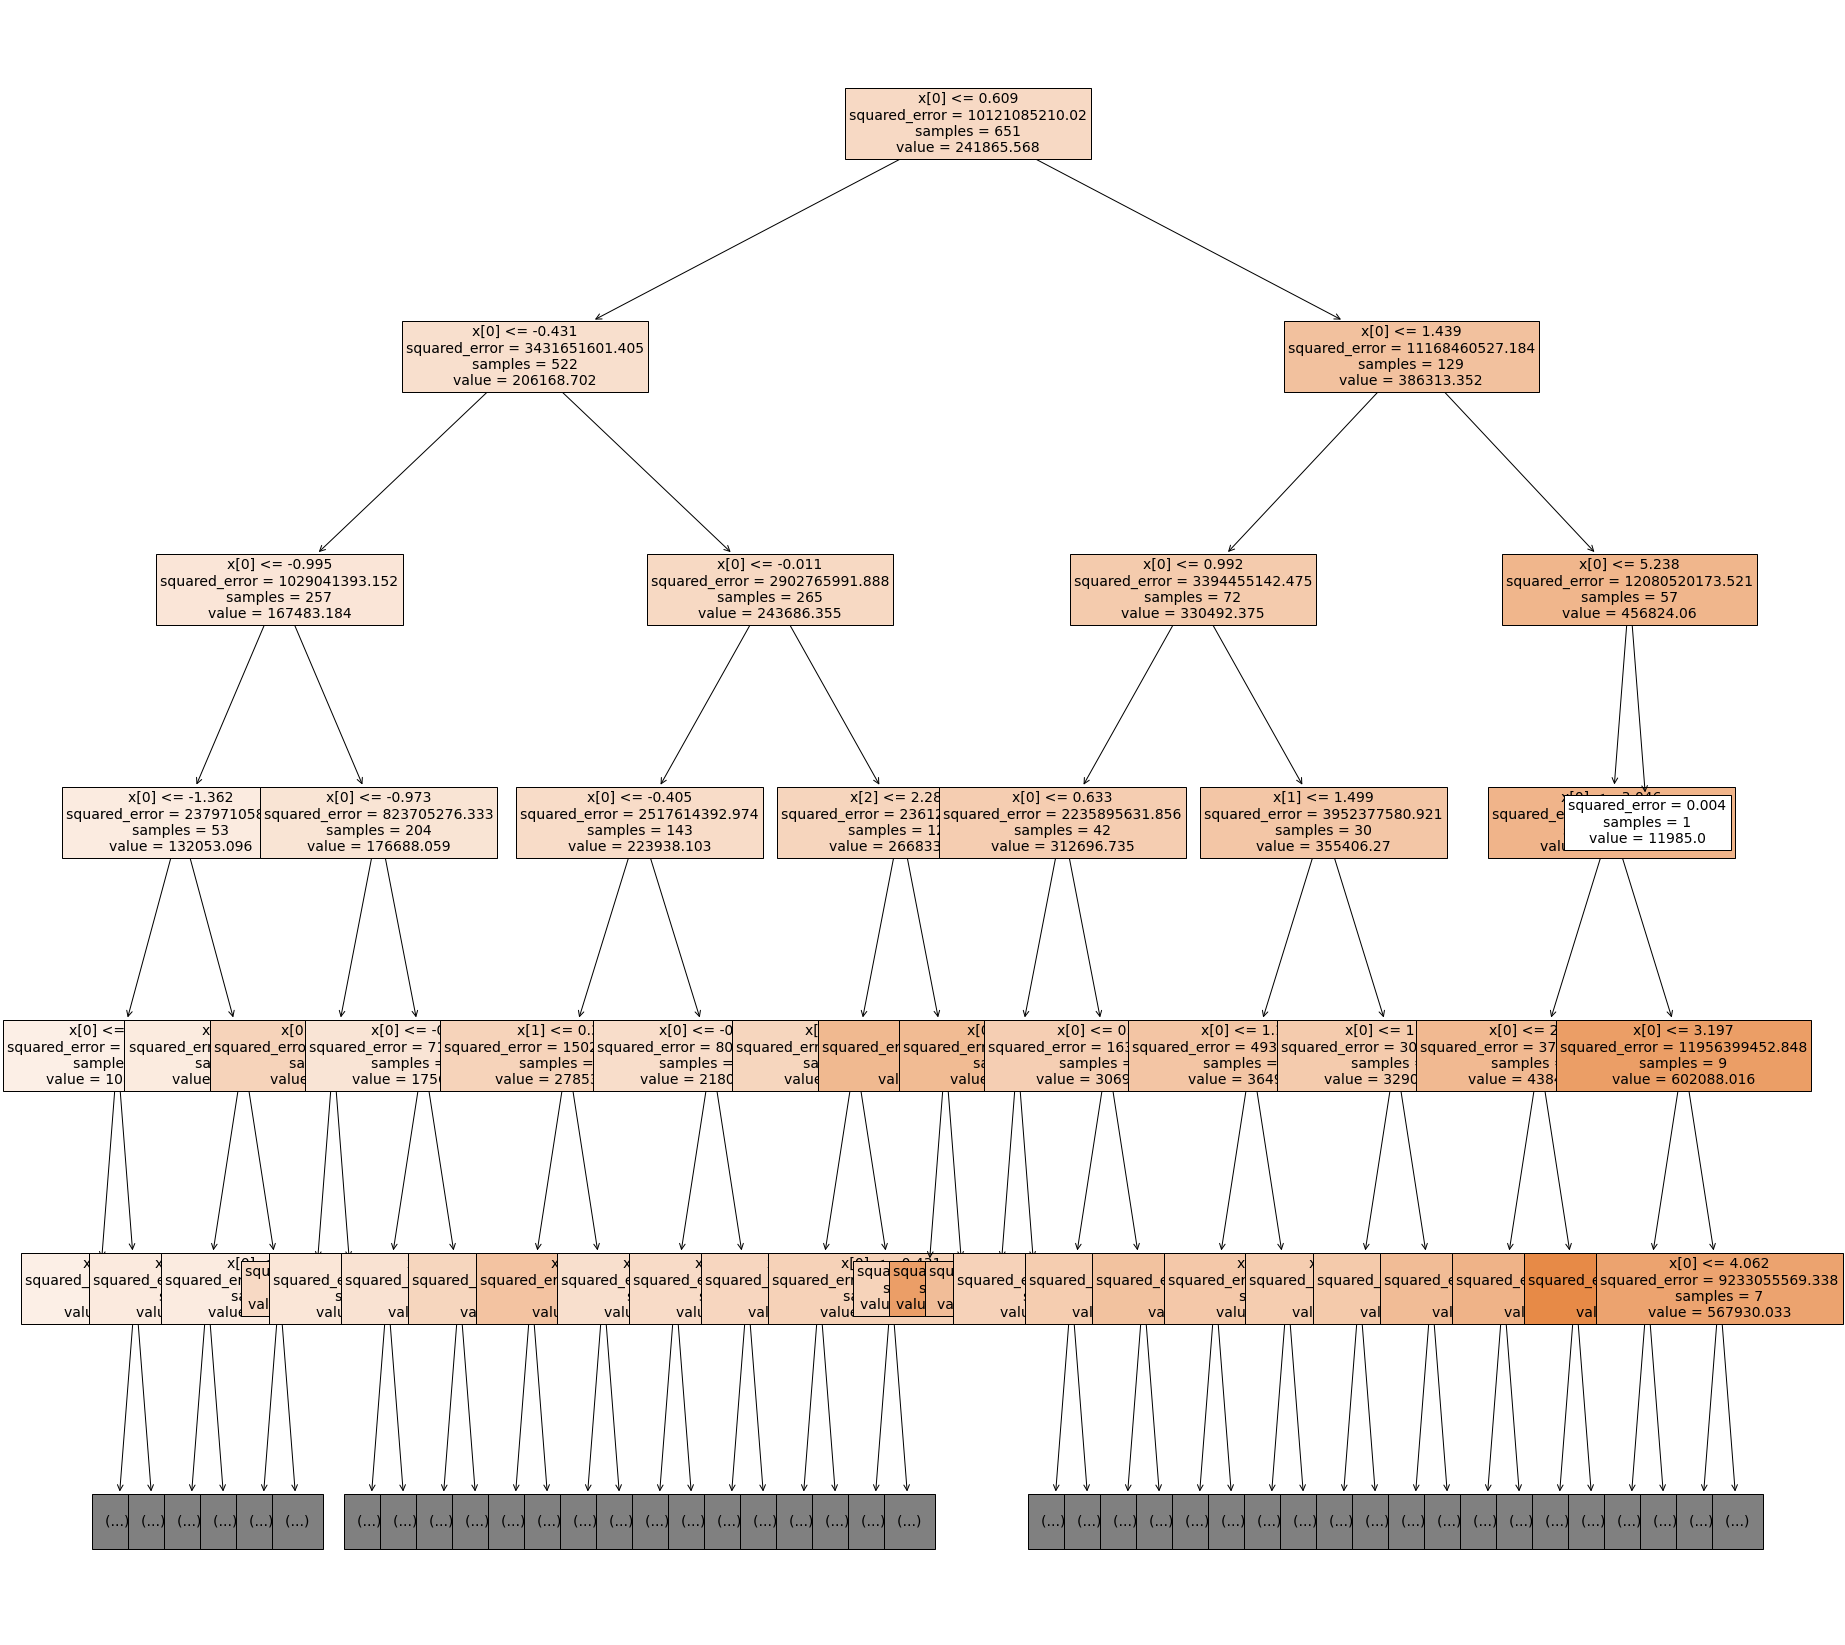

In [25]:
fig = plt.figure(figsize=(30, 30))

_ = plot_tree(
    model2.named_steps['dt'],
    filled = True,
    max_depth=5,
    fontsize=14
)